In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection

## 1. Read the Data
First read in the dataframe. You'll notice it's similar to the dataframe that you ended the final solution with in Lesson 2, Exercise 4, only with more data:

In [2]:
d = pd.read_csv('findings_data_5000.csv')
d.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Atelectasis,3,79,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cardiomegaly|Edema|Effusion,4,55,F,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Consolidation|Mass,5,68,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 2. Understand the Distribution
Just like in Lesson 2, Exercise 4, we want to see how different diseases are distributed with our disease of interest, as well as how age and gender are distributed:

In [3]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

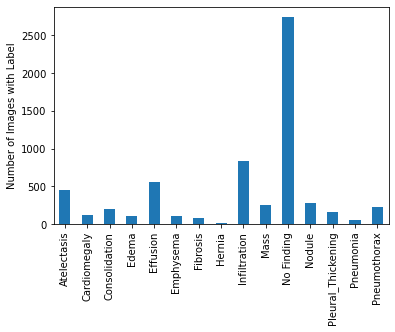

In [4]:
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label');

**Since there are many combinations of potential findings, let's look at the 30 most common co-occurrences:**

In [5]:
d[d.Pneumothorax==1]['Finding Labels']

17                       Mass|Pneumothorax
22                            Pneumothorax
65                            Pneumothorax
79                            Pneumothorax
80                  Emphysema|Pneumothorax
                       ...                
4921                          Pneumothorax
4922       Pleural_Thickening|Pneumothorax
4958    Effusion|Infiltration|Pneumothorax
4959                          Pneumothorax
4974                          Pneumothorax
Name: Finding Labels, Length: 220, dtype: object

In [8]:
d[d.Pneumothorax==1]['Finding Labels'].value_counts()

Pneumothorax                                                        95
Effusion|Pneumothorax                                               16
Infiltration|Pneumothorax                                           14
Mass|Pneumothorax                                                   14
Emphysema|Pneumothorax                                              11
Pleural_Thickening|Pneumothorax                                      6
Atelectasis|Pneumothorax                                             6
Nodule|Pneumothorax                                                  6
Atelectasis|Effusion|Pneumothorax                                    4
Mass|Nodule|Pneumothorax                                             3
Effusion|Emphysema|Pneumothorax                                      3
Effusion|Pleural_Thickening|Pneumothorax                             2
Emphysema|Mass|Pneumothorax                                          2
Atelectasis|Infiltration|Pneumothorax                                2
Effusi

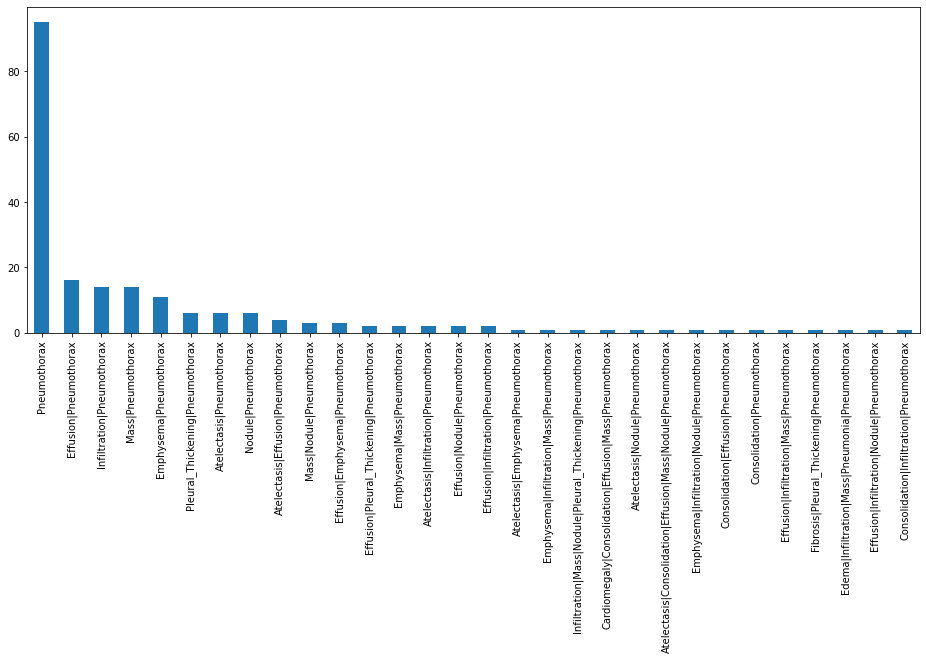

In [9]:
plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar');

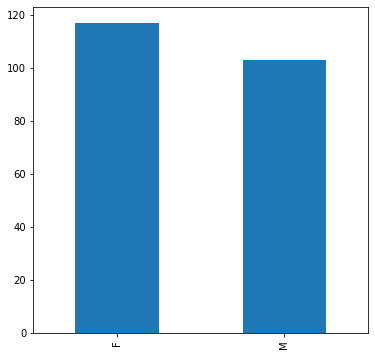

In [10]:
plt.figure(figsize=(6,6))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar');

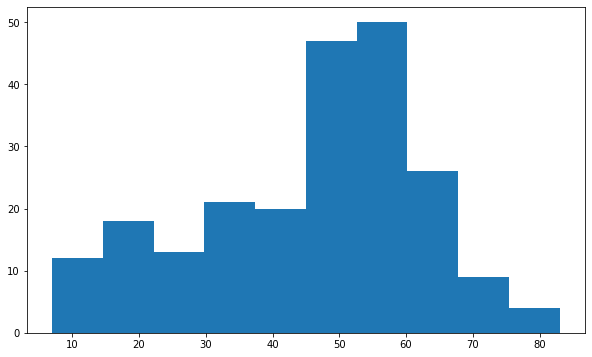

In [11]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Pneumothorax==1]['Patient Age']);

## 3. To Do - Exercise - Split the Data into Train/Test Partitions
Now, knowing what we know from above, let's create the appropriate training and validation sets for a model that we want to train to classify the presence of a Pneumothorax. Also, take care of the following conditions: 
1. To have _EQUAL_ amount of positive and negative cases of Pneumothorax in Training
2. To have 20% positive cases of Pneumothorax in the Test Set

**Hint: you can random sample the negative cases to obtain a balanced training set.**

In [9]:
# Your code goes here

In [17]:
d_positive = d[d["Pneumothorax"]==1]
len(d_positive)

220

In [18]:
d_negative = d[d["Pneumothorax"]==0]
len(d_negative)

4779

In [24]:
d_negative.sample(n=220, random_state=1)

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
3063,3064,No Finding,3064,53,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2988,2989,Atelectasis|Nodule,2989,59,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
990,991,Effusion,991,11,F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
865,866,No Finding,866,45,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1968,1969,No Finding,1969,32,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1795,No Finding,1795,28,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2359,2360,Cardiomegaly|Pleural_Thickening,2360,79,F,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
620,621,No Finding,621,40,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4299,4300,No Finding,4300,65,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
d_negative_220 = d_negative.sample(n=220, random_state=1)
len(d_negative_220)

220

In [26]:
d_positive_train, d_positive_test = sklearn.model_selection.train_test_split(d_positive, test_size=0.2)

In [27]:
len(d_positive_train), len(d_positive_test)

(176, 44)

In [28]:
d_negative_train, d_negative_test = sklearn.model_selection.train_test_split(d_negative_220, test_size=0.2)

In [29]:
len(d_negative_train), len(d_negative_test)

(176, 44)